<a href="https://colab.research.google.com/github/brioglade/gmt/blob/main/meca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

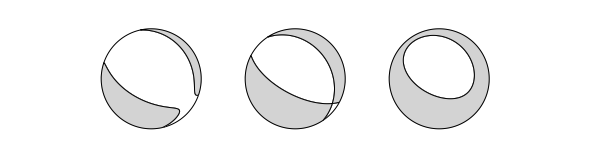

In [ ]:

;;;;NED

from matplotlib import pyplot as plt
from pyrocko import moment_tensor as pmt
from pyrocko import plot
from pyrocko.plot import beachball


fig = plt.figure(figsize=(4., 2.))
fig.subplots_adjust(left=0., right=2., bottom=0., top=1.)
axes = fig.add_subplot(1, 1, 1)
axes.set_xlim(0., 4.)
axes.set_ylim(0., 2.)
axes.set_axis_off()

for i, beachball_type in enumerate(['full', 'dc', 'deviatoric' ]):
    beachball.plot_beachball_mpl(
            pmt.as_mt((1.233, 1.9055, -13.606,
                       2.9689, -7.3092, -1.5527)),
            axes,
            beachball_type=beachball_type,
            size=100.,
            position=(i+1, 1),
            color_t=plot.mpl_color('lightgrey'),
            linewidth=1.0)

fig.savefig('beachball-example03.pdf')
plt.show()

In [1]:
!pip install pyrocko

In [2]:
!pip install obspy

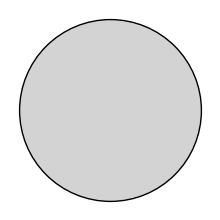

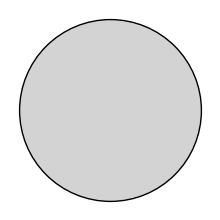

In [ ]:
;;;;;;USE


from obspy.imaging.beachball import beachball
mt = [1, 1, 1, 0, 0, 0]
;;mt = [-13.4, 1.211, 1.888, -7.208, 1.523, -2.9536]
beachball(mt, size=200, linewidth=1, facecolor='lightgrey' )

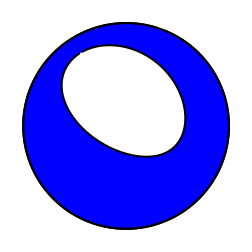

In [ ]:
;;;;;;;NED

from obspy.imaging.mopad_wrapper import beachball
mt = [1.233, 1.9055, -13.606,
                       2.9689, -7.3092, -1.5527]
beachball(mt, mopad_basis='NED', size=130 ) 

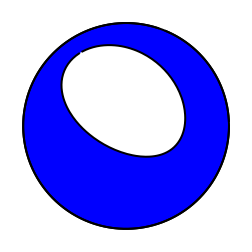

In [ ]:
from obspy.imaging.mopad_wrapper import beachball
mt = [-13.4, 1.211, 1.888, -7.208, 1.523, -2.9536]
beachball(mt, mopad_basis='USE', size=130 ) 
#mt2 = [117.8880, 64.4482, -103.1510]
#beachball(mt2, size=130, linewidth=2, facecolor='r')
#mt3 = [326.3310, 28.5337, -64.5512]
#beachball(mt3, size=130, linewidth=2, facecolor='r')

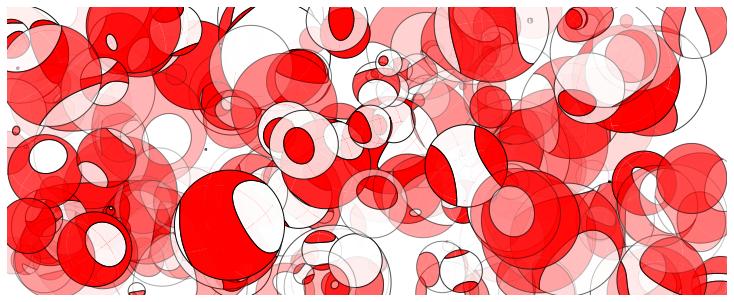

In [ ]:
import random
import logging
from matplotlib import pyplot as plt
from pyrocko import moment_tensor as pmt
from pyrocko import util
from pyrocko.plot import beachball

''' Beachball Copacabana '''

logger = logging.getLogger('pyrocko.examples.beachball_example01')

util.setup_logging()

fig = plt.figure(figsize=(10., 4.))
fig.subplots_adjust(left=0., right=1., bottom=0., top=1.)
axes = fig.add_subplot(1, 1, 1)

for i in range(200):

    # create random moment tensor
    mt = pmt.MomentTensor.random_mt()

    try:
        # create beachball from moment tensor
        beachball.plot_beachball_mpl(
            mt, axes,
            # type of beachball: deviatoric, full or double couple (dc)
            beachball_type='full',
            size=random.random()*120.,
            position=(random.random()*10., random.random()*10.),
            alpha=random.random(),
            linewidth=1.0)

    except beachball.BeachballError as e:
        logger.error('%s for MT:\n%s' % (e, mt))

axes.set_xlim(0., 10.)
axes.set_ylim(0., 10.)
axes.set_axis_off()
fig.savefig('beachball-example01.pdf')

plt.show()